In [1]:
import math
import random as rd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
N = 100
theta = 10
xn = [rd.uniform(theta, 2 * theta) for i in range(N)]
print(xn)

[10.801293929158057, 10.986613442791784, 11.633722630062257, 17.307161606792192, 18.035781853753193, 10.284566383606007, 16.827332054653546, 11.227473935899777, 12.092469128482673, 18.081808097754816, 10.750512137804337, 11.720011711099547, 17.925774802197516, 12.983448829363983, 13.336117648975351, 10.027877749658, 16.865804443009612, 13.550353271767449, 15.937601228576135, 10.160682276549926, 12.857444545635037, 15.040890177183737, 12.980381947771395, 14.138085197537599, 10.34977569140599, 13.078550741147998, 19.11839551812583, 18.261478546153455, 13.478435435920321, 10.3443785767843, 12.718655995435174, 18.064593995793672, 19.841195705149303, 18.945054374405363, 16.135757897975566, 16.44095087069951, 15.624910029144061, 18.20380235133078, 15.683712409992394, 15.306649748808093, 10.386192370965743, 14.233636581893515, 17.296853732383585, 13.05804767798843, 12.148351424139163, 17.408319455330705, 16.468062126082884, 19.87909915587546, 10.824728004238978, 15.357255197367657, 16.5630296

In [3]:
t1 = (0.025 + (0.5)**N)**(1/N)
t2 = (0.975)**(1/N)
x_max = max(xn)

border1_precise = x_max/2/t2
border2_precise = x_max/2/t1

print(f'Точный доверительный интервал:\n{border1_precise} < theta < {border2_precise}')

Точный доверительный интервал:
9.942066372599552 < theta < 10.313054295594284


In [4]:
med = sum(xn)/N
sigma = sum([(elem - med) ** 2 / 100 for elem in xn]) ** 0.5  #s

In [5]:
t1, t2 = -1.96, 1.96
theta1 = 2 / 3 * med

border1_asympt = theta1 + t1 * 2 * sigma / 3 / (N)**0.5
border2_asympt = theta1 + t2 * 2 * sigma / 3 / (N)**0.5

print(f'Асимптотический доверительный интервал:\n {border1_asympt} < theta < {border2_asympt}')

Асимптотический доверительный интервал:
 9.303607640465755 < theta < 10.042440233400521


In [6]:
deltas = []
for i in range(1000):
    xn_ = [rd.uniform(theta, 2 * theta) for j in range(N)]
    med_ = sum(xn_)/N
    theta_ = 2 / 3 * med_
    deltas.append(theta_ - theta1)
deltas.sort()

border1_boot = theta1 - deltas[974]
border2_boot = theta1 - deltas[24]

print(f'Бутстраповский доверительный интервал:\n{border1_boot} < theta < {border2_boot}')

Бутстраповский доверительный интервал:
8.963021606972042 < theta < 9.718713399092849


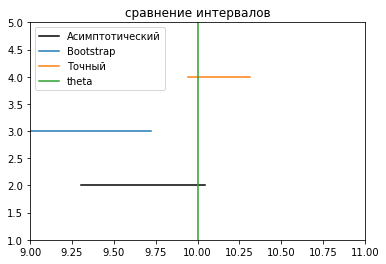

In [7]:
asympt = np.linspace(border1_asympt, border2_asympt, 200)
plt.plot(asympt, 2*np.ones_like(asympt),color='black', label='Асимптотический')

boot = np.linspace(border1_boot, border2_boot, 200)
plt.plot(boot, 3*np.ones_like(boot), label='Bootstrap')

precise = np.linspace(border1_precise, border2_precise, 200)
plt.plot(precise, 4*np.ones_like(precise), label='Точный')

plt.plot([theta, theta],[1, 5], label="theta")
plt.xlim(9, 11)
plt.ylim(1, 5)
plt.title("сравнение интервалов")
plt.legend()